## Customer Lifetime Value Analysis

Customer lifetime value analysis is used to estimate the total value of customers to the business over the lifetime of their relationship. It helps businesses make data-driven decisions on how to allocate their resources and improve their customer relationships.Customer lifetime value analysis is used to estimate the total value of customers to the business over the lifetime of their relationship. It helps companies determine how much to invest in customer acquisition and retention, as well as identify the most valuable customers to prioritize for retention efforts.
By analyzing customer lifetime value, companies can identify the most effective marketing channels and campaigns for acquiring high-value customers, as well as develop targeted retention strategies to keep those customers engaged and loyaI’ll start this task by importing the necessary Python libraries and the dataset:l.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv("customer_acquisition_data.csv")

# Display first few rows
print(data.head())

   customer_id           channel       cost  conversion_rate  revenue
0            1          referral   8.320327         0.123145     4199
1            2  paid advertising  30.450327         0.016341     3410
2            3   email marketing   5.246263         0.043822     3164
3            4      social media   9.546326         0.167592     1520
4            5          referral   8.320327         0.123145     2419


Let’s start by visualizing the distribution of acquisition cost and revenue generated by the customer using histograms:

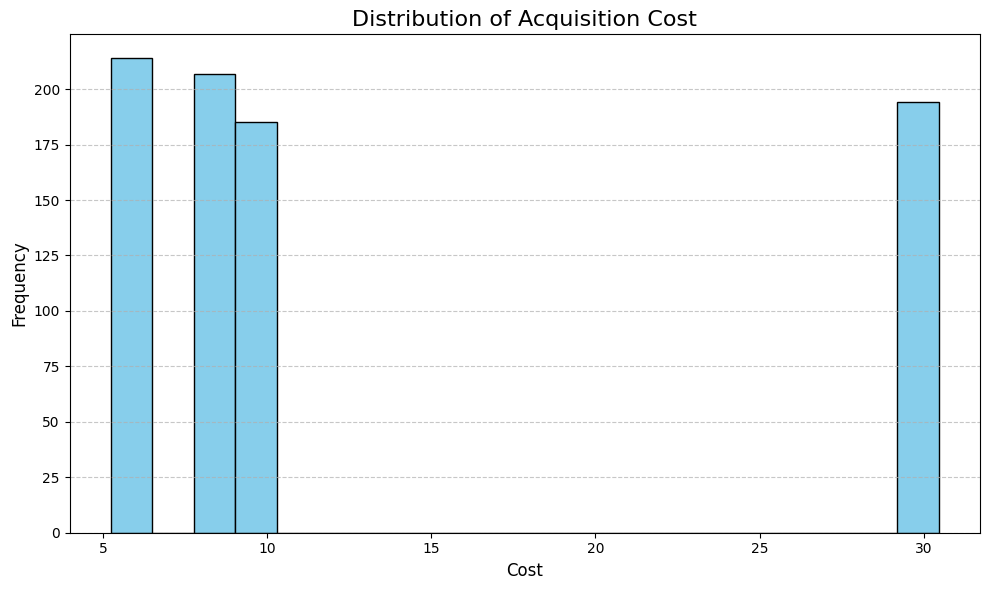

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("customer_acquisition_data.csv")

# Plot histogram of acquisition cost
plt.figure(figsize=(10, 6))
plt.hist(data["cost"], bins=20, color='skyblue', edgecolor='black')

# Labels and title
plt.title('Distribution of Acquisition Cost', fontsize=16)
plt.xlabel('Cost', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

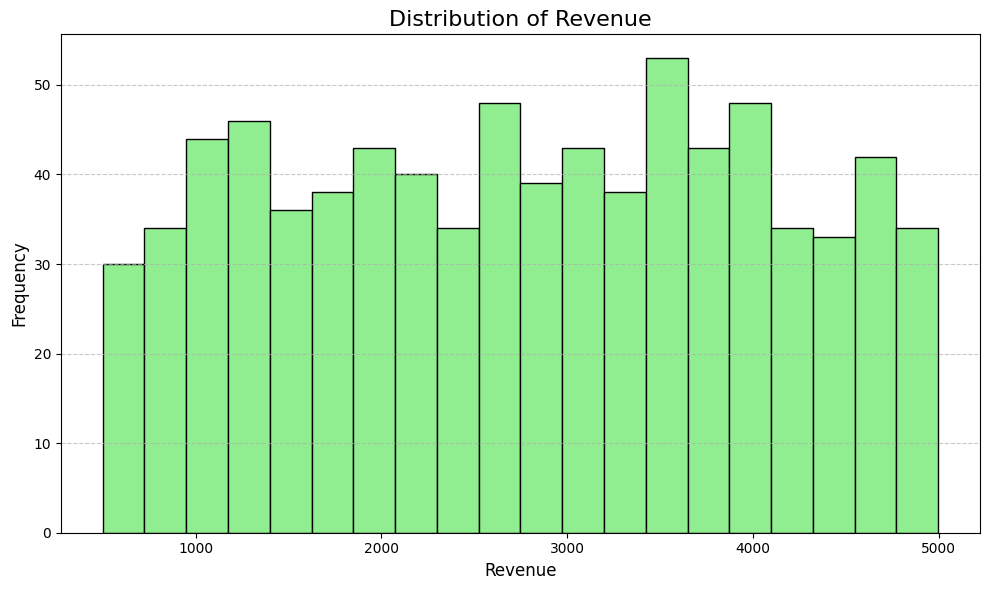

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("customer_acquisition_data.csv")

# Plot histogram for revenue
plt.figure(figsize=(10, 6))
plt.hist(data["revenue"], bins=20, color='lightgreen', edgecolor='black')

# Labels and title
plt.title('Distribution of Revenue', fontsize=16)
plt.xlabel('Revenue', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now let’s compare the cost of acquisition across different channels and identify the most and least profitable channels:

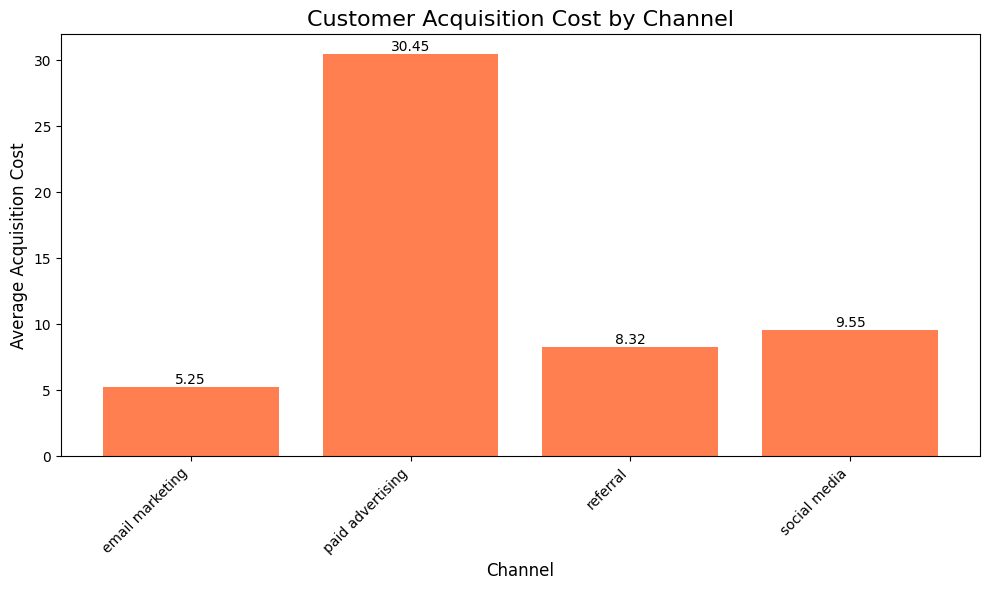

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("customer_acquisition_data.csv")

# Compute average cost by channel
cost_by_channel = data.groupby('channel')['cost'].mean().reset_index()

# Bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(cost_by_channel['channel'], cost_by_channel['cost'], color='coral')

# Title and labels
plt.title('Customer Acquisition Cost by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Acquisition Cost', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2f}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

So paid advertisement is the most expensive channel, and email marketing is the least expensive channel. Now let’s see which channels are most and least effective at converting customers:

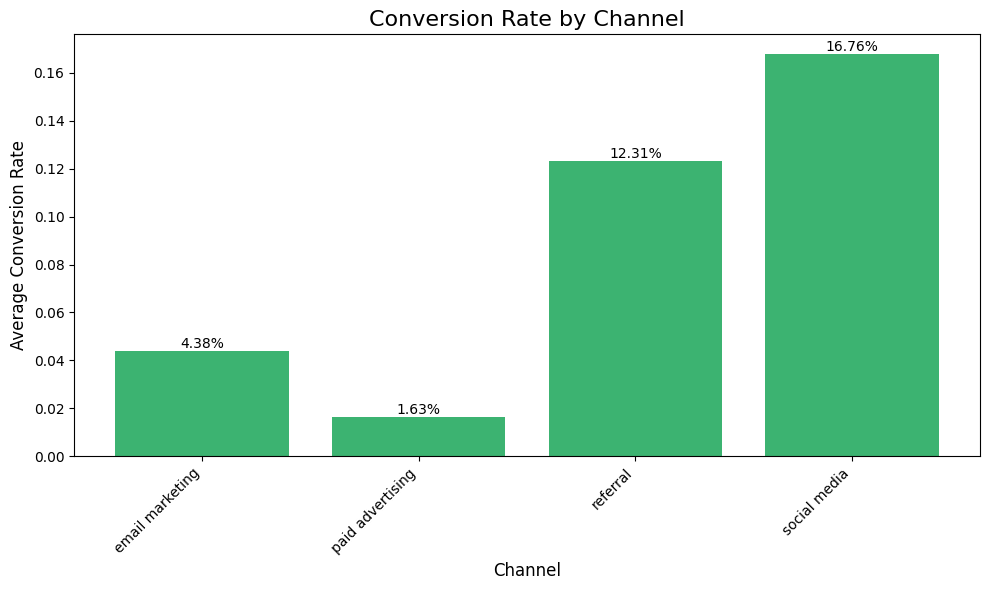

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("customer_acquisition_data.csv")

# Calculate average conversion rate by channel
conversion_by_channel = data.groupby('channel')['conversion_rate'].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(conversion_by_channel['channel'], conversion_by_channel['conversion_rate'], color='mediumseagreen')

# Title and labels
plt.title('Conversion Rate by Channel', fontsize=16)
plt.xlabel('Channel', fontsize=12)
plt.ylabel('Average Conversion Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.2%}',
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

Social media is the most effective channel for converting customers, while paid advertising is the least effective. Now let’s calculate the total revenue by channel and have a look at the most and least profitable channels in terms of generating revenue:

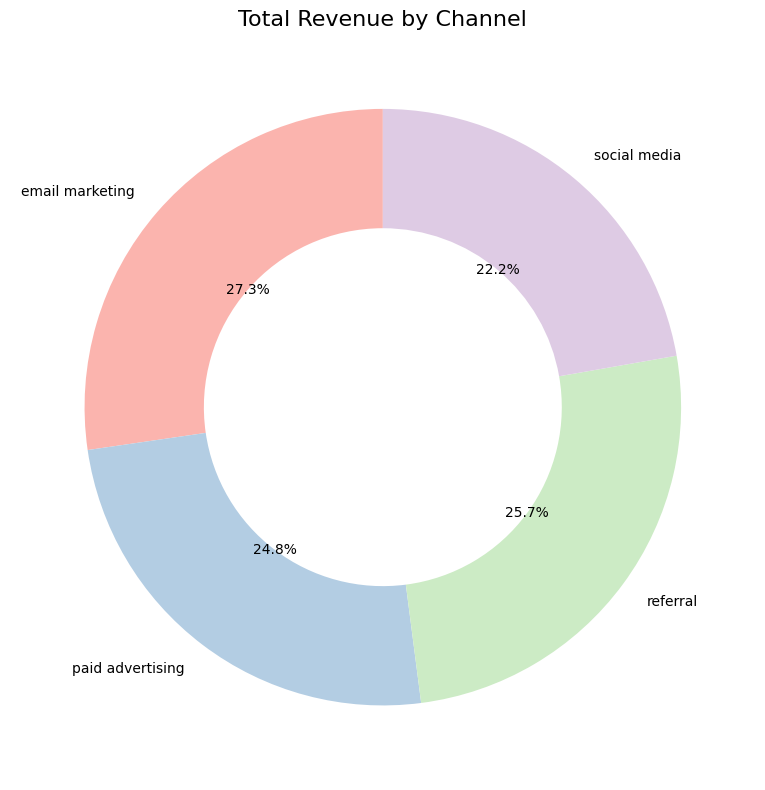

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("customer_acquisition_data.csv")

# Group by channel and sum revenue
revenue_by_channel = data.groupby('channel')['revenue'].sum().reset_index()

# Donut chart
plt.figure(figsize=(8, 8))
colors = plt.cm.Pastel1.colors  # Optional: pastel color palette

# Pie with hole = donut
wedges, texts, autotexts = plt.pie(
    revenue_by_channel['revenue'],
    labels=revenue_by_channel['channel'],
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'width': 0.4}
)

# Title
plt.title('Total Revenue by Channel', fontsize=16)
plt.tight_layout()
plt.show()

So email marketing is the most profitable channel in terms of generating revenue. But there’s not a huge difference between the percentages of revenue generation from all the channels to call any channel the least profitable channel.

Now let’s calculate the return on investment (ROI) for each channel:

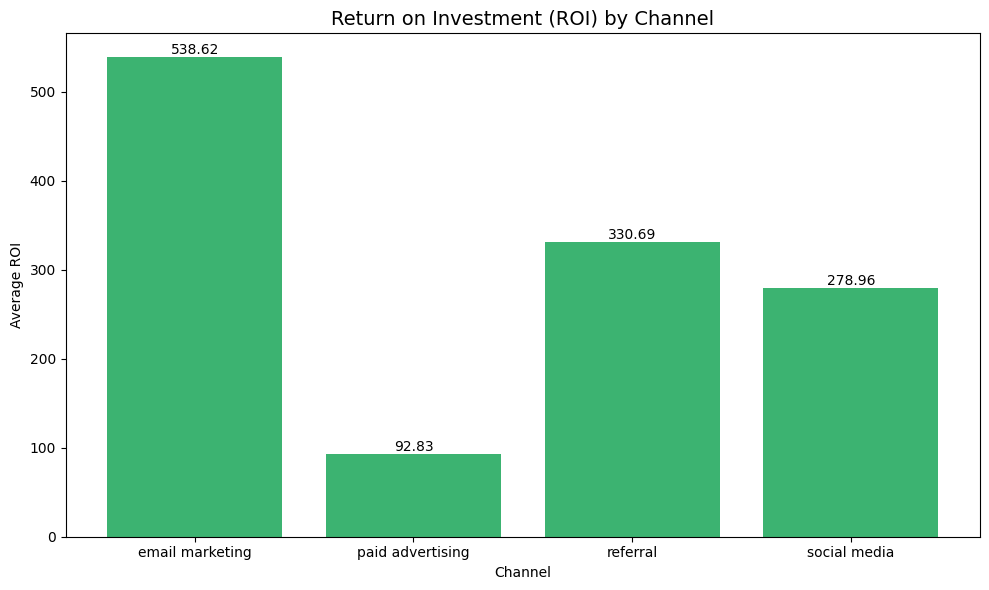

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("customer_acquisition_data.csv")

# Calculate ROI
data['roi'] = data['revenue'] / data['cost']

# Group by channel
roi_by_channel = data.groupby('channel')['roi'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(roi_by_channel['channel'], roi_by_channel['roi'], color='mediumseagreen')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, f'{yval:.2f}', ha='center', va='bottom')

# Labels and title
plt.title('Return on Investment (ROI) by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('Average ROI')
plt.tight_layout()
plt.show()

The ROI from email marketing is way higher than all other channels, while the ROI from paid advertising is the lowest. Now let’s calculate the customer lifetime value from each channel. Based on the data we have, we can use the formula mentioned below to calculate CLTV:

CLTV = (revenue – cost) * conversion_rate / cost

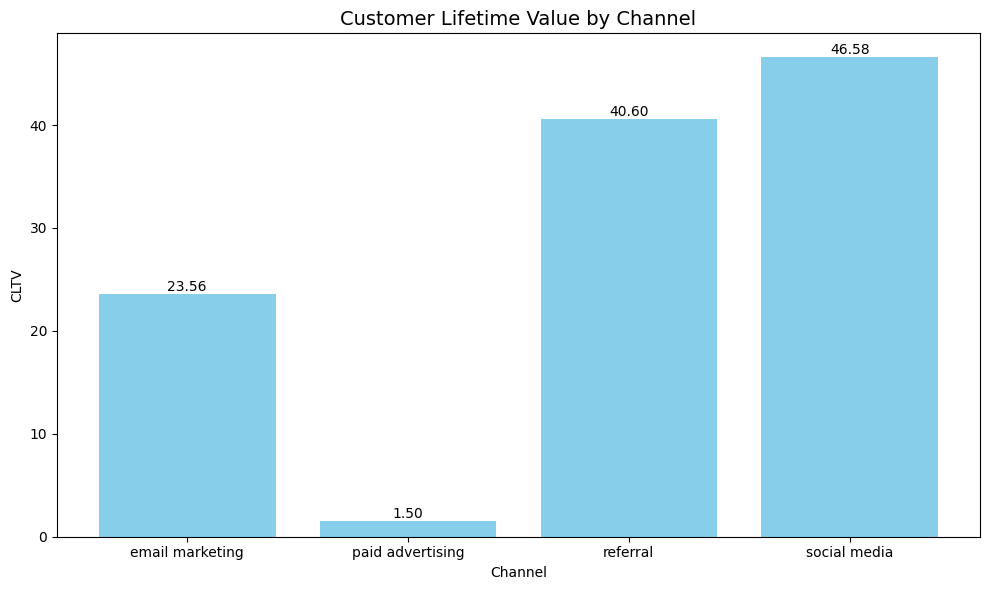

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
data = pd.read_csv("customer_acquisition_data.csv")

# Compute CLTV
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']

# Group by channel
channel_cltv = data.groupby('channel')['cltv'].mean().reset_index()

# Plot
plt.figure(figsize=(10, 6))
bars = plt.bar(channel_cltv['channel'], channel_cltv['cltv'], color='skyblue')

# Add value labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', va='bottom')

# Customize axes and title
plt.title('Customer Lifetime Value by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.tight_layout()
plt.show()

So the customer lifetime value from Social Media and the referral channels is the highest.

Now let’s compare the CLTV distributions of the social media and referral channels:

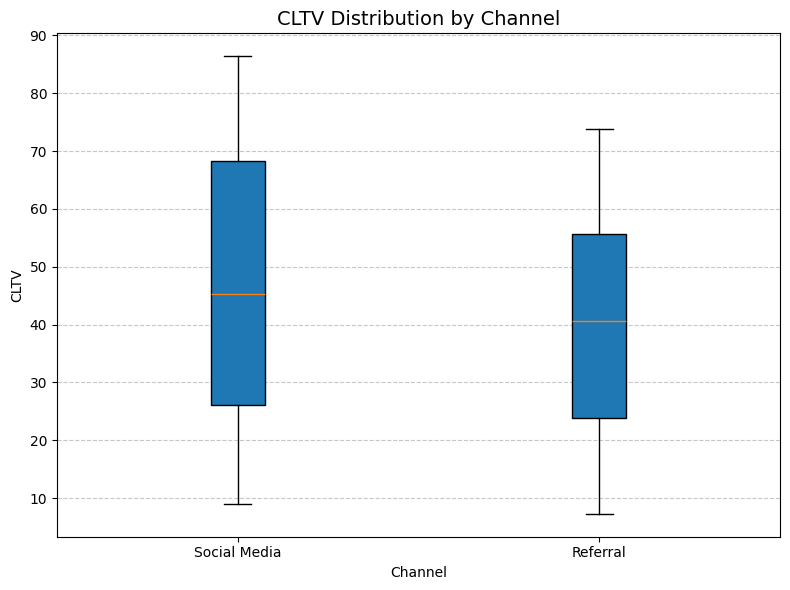

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load and filter the data
data = pd.read_csv("customer_acquisition_data.csv")
data['cltv'] = (data['revenue'] - data['cost']) * data['conversion_rate'] / data['cost']
subset = data[data['channel'].isin(['social media', 'referral'])]

# Prepare data for boxplot
grouped_cltv = [subset[subset['channel'] == ch]['cltv'] for ch in ['social media', 'referral']]

# Plot
plt.figure(figsize=(8, 6))
plt.boxplot(grouped_cltv, labels=['Social Media', 'Referral'], patch_artist=True)

# Title and axis labels
plt.title('CLTV Distribution by Channel', fontsize=14)
plt.xlabel('Channel')
plt.ylabel('CLTV')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

There’s not much difference, but the Customer Lifetime Value from the Social Media channel is slightly better than the referral channel.

Customer lifetime value analysis is used to estimate the total value of customers to the business over the lifetime of their relationship. It helps companies determine how much to invest in customer acquisition and retention, as well as identify the most valuable customers to prioritize for retention efforts. 